In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, SMOTE
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


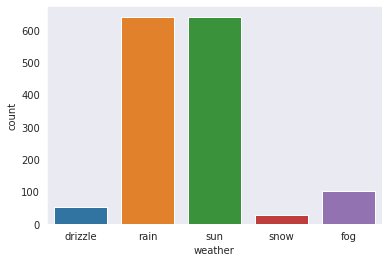

In [ ]:
file_path = "/content/sample_data/seattle-weather.csv"
# importar os dados para um dataframe
df = pd.read_csv(file_path)
# ver o balanceamento das classes
print(df.weather.value_counts())
# plotar gráfico de barras para as Classes
sns.countplot('weather', data=df);

In [ ]:
# separar variáveis entre X e y
X = df.drop('weather', axis=1)
y = df['weather']
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

     drizzle     0.0000    0.0000    0.0000        13
         fog     0.0000    0.0000    0.0000        25
        rain     0.9554    0.9317    0.9434       161
        snow     0.0000    0.0000    0.0000         7
         sun     0.7644    0.9938    0.8641       160

    accuracy                         0.8443       366
   macro avg     0.3440    0.3851    0.3615       366
weighted avg     0.7545    0.8443    0.7928       366

Acurácia: 0.8443



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


drizzle    641
rain       641
sun        641
snow       641
fog        641
Name: weather, dtype: int64


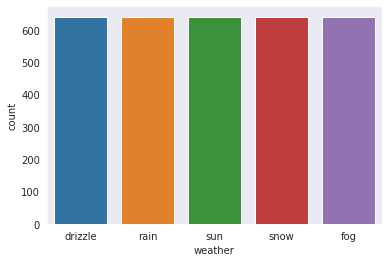

In [ ]:
# usar técnica under-sampling
smote = SMOTE(sampling_strategy='not majority')
X_smote_res, y_smote_res = smote.fit_resample(X, y)
# ver o balanceamento das classes
print(pd.Series(y_smote_res).value_counts())
# plotar a nova distribuição de classes
sns.countplot(y_smote_res);

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_smote_res, y_smote_res)
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))


Relatório de Classificação:
               precision    recall  f1-score   support

     drizzle     0.1351    0.3846    0.2000        13
         fog     0.1818    0.3200    0.2319        25
        rain     0.9929    0.8696    0.9272       161
        snow     0.3529    0.8571    0.5000         7
         sun     0.8583    0.6813    0.7596       160

    accuracy                         0.7322       366
   macro avg     0.5042    0.6225    0.5237       366
weighted avg     0.8359    0.7322    0.7724       366

Acurácia: 0.7322



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X_smote_res.to_csv('balanced.csv')